El proceso de ETL (Extract, Transform, Load) es fundamentalmente la extracción de datos de múltiples fuentes, la transformación de estos datos para adaptarlos a un formato específico y finalmente cargarlos en una base de datos o almacén de datos para su análisis. 

IMPORTAMOS LIBRERÍAS 

In [45]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Extracción de datos

In [46]:
# Lee los datos de hechos_homicidios desde un archivo Excel
df = pd.read_excel('Data/homicidios.xlsx')



In [47]:
df.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [48]:
# Una vez cargado el dataframe continuamos verificando el tipo de datos que contiene
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Transformaciónes de tipo de datos
Se aplican las transformaciones necesarias al tipo de datos ya que con ellas haremos los analisis. Viendo el tipo de dato se tienen que cambiar, los tipos de dato de "HORA" , "pos x", "pos y". Para esto se requiere aplicar a Hora, pasarlo a formato datetime y a las posiciones pasarlas "pos x" y "pos y" a tipo float.

In [49]:
# Se cambia el tipo de dato de "HORA" a formato datetime timestamp
df['HORA'] = pd.to_datetime(df["HORA"], format='%H:%M:%S', errors="coerce")
df 

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,1900-01-01 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,1900-01-01 00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,1900-01-01 05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,1900-01-01 17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,1900-01-01 01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,1900-01-01 00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,1900-01-01 10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [50]:
# Dado que los datos de posicion no estan en forma numerica se cambian a float que es un mejor formato para las posiciones.
df['pos x'] = pd.to_numeric(df['pos x'], errors='coerce')
df['pos y'] = pd.to_numeric(df['pos y'], errors='coerce')

In [51]:
# Se comprueba que se cambiaran los tipos de datos 
df.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                     datetime64[ns]
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                           float64
pos y                           float64
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object

Creamos la columna Semestre 

In [52]:
df['FECHA'] = pd.to_datetime(df['FECHA'])

In [53]:
# Luego, puedes generar la columna 'Semestre' basada en la fecha
df['Semestre'] = df['FECHA'].dt.year.astype(str) + '-' + ((df['FECHA'].dt.quarter + 1) // 2).astype(str)

In [54]:
# Ver las primeras filas del DataFrame con la columna 'Semestre'
print(df[['FECHA', 'Semestre']].head())

       FECHA Semestre
0 2016-01-01   2016-1
1 2016-01-02   2016-1
2 2016-01-03   2016-1
3 2016-01-10   2016-1
4 2016-01-21   2016-1


In [55]:
print(df.columns)

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'Semestre'],
      dtype='object')


In [56]:
df.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Semestre
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,2016-1
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-1


Transformaciónes de columnas
La columna cruce no trae tanta informacion ya que hay mucho nulos por lo que se aplicara un filtro que nos indique si hay un cruce

In [24]:
#  Se genera una columna que nos da si la calle fue un cruce o no 

def transformar_cruce(valor):
    if pd.isna(valor):
        return False 
    else:
        return True


df["Hay Cruce"] = df["Cruce"].apply(transformar_cruce)

In [25]:
# Se comprueba que se agregara la columna
df.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Hay Cruce,Semestre
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,True,2016-1
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,True,2016-1


Se buscan valores nulos
Los valores nulos no necesariamente son errores por lo que se buscan los valores y dependiendo de la columna se escojen cuales valores nulos pueden eliminarse.

In [26]:
df.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       4
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                     12
pos y                     12
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
Hay Cruce                  0
Semestre                   0
dtype: int64

Hay una que no tiene hora la cual se va a buscar si es un error ya que el no tenerla puede indicar un error.

In [27]:
df[df['HORA'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Hay Cruce,Semestre
439,2019-0022,1,2019-03-15,2019,3,15,NaT,0,ENTRE RIOS AV. BAJO PUENTE AUTOPISTA (1260 APROX),AVENIDA,...,ENTRE RIOS AV. 1260,1,Point (106608.39392805 100635.27735528),-58.391238,-34.623522,AUTO-SD,AUTO,SD,False,2019-1
441,2019-0024,1,2019-03-19,2019,3,19,NaT,7,ANTARTIDA ARGENTINA AV. 1325,AVENIDA,...,ANTARTIDA ARGENTINA AV. 1325,1,Point (108368.93688513 104860.74716674),-58.372081,-34.585420,MOTO-CARGAS,MOTO,CARGAS,False,2019-1
496,2019-0080,1,2019-09-17,2019,9,17,NaT,18,"CABILDO AV. y PAZ, GRAL. AV.",GRAL PAZ,...,"CABILDO AV. y PAZ, GRAL. AV.",13,Point (98817.74986778 110096.31367495),-58.476178,-34.538257,PEATON-MOTO,PEATON,MOTO,True,2019-2
518,2019-0103,1,2019-12-18,2019,12,18,NaT,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.521694,-34.594716,MOTO-MOTO,MOTO,MOTO,True,2019-2


Se comprueba que el valor nulo no es un error.

In [28]:
df[df['pos x'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Hay Cruce,Semestre
38,2016-0052,1,2016-04-20,2016,4,20,1900-01-01 20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,13,Point (. .),NaN,NaN,MOTO-SD,MOTO,SD,False,2016-1
106,2016-0136,1,2016-10-25,2016,10,25,1900-01-01 00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,4,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS,False,2016-2
119,2016-0151,1,2016-11-18,2016,11,18,1900-01-01 20:35:00,20,SD,CALLE,...,NaN,0,Point (. .),NaN,NaN,PEATON-SD,PEATON,SD,False,2016-2
139,2016-0174,1,2016-12-27,2016,12,27,1900-01-01 00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,AUTOPISTA 25 DE MAYO,0,Point (. .),NaN,NaN,SD-SD,SD,SD,False,2016-2
176,2017-0042,1,2017-04-10,2017,4,10,1900-01-01 09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,"LUGONES, LEOPOLDO AV.",14,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS,False,2017-1
180,2017-0050,2,2017-04-28,2017,4,28,1900-01-01 11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,9,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS,False,2017-1
181,2017-0051,1,2017-05-01,2017,5,1,1900-01-01 03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,7,Point (. .),NaN,NaN,AUTO-AUTO,AUTO,AUTO,False,2017-1
256,2017-0140,1,2017-11-19,2017,11,19,1900-01-01 23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),NaN,NaN,MOTO-PASAJEROS,MOTO,PASAJEROS,False,2017-2
313,2018-0039,1,2018-04-21,2018,4,21,1900-01-01 22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,14,Point (. .),NaN,NaN,PEATON-AUTO,PEATON,AUTO,False,2018-1
546,2020-0026,1,2020-05-17,2020,5,17,1900-01-01 06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,14,Point (. .),NaN,NaN,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,False,2020-1


In [29]:
df[df['Calle'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Hay Cruce,Semestre
119,2016-0151,1,2016-11-18,2016,11,18,1900-01-01 20:35:00,20,SD,CALLE,...,NaN,0,Point (. .),NaN,NaN,PEATON-SD,PEATON,SD,False,2016-2


No se encuentra ningun error, no se borran valores Nulos los encuentro utliles 

Se buscan valores duplicados
Se comprueba que no existan valores duplicados que nos lleven a un error.



In [30]:
df[df.duplicated()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Hay Cruce,Semestre


No se encuentran valosres duplicados 

SE EXPORTA A CSV
Una vez limpio el dataset este se exporta a csv para que se pueda acceder a el con facilidad

df.to_csv('homicidios.csv', index = False)

In [31]:
df.to_csv('homicidios.csv', index = False)

In [32]:
# Se comprueba que el CSV funcione
df = pd.read_csv('homicidios.csv')
df.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Hay Cruce,Semestre
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,True,2016-1
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,True,2016-1


Tabla de Victimas
Una vez terminado el ETL de la tabla "HECHOS" se continua con el ETL de la tabla "VICTIMAS"

In [33]:
df2 = pd.read_excel("Data/homicidios.xlsx", "VICTIMAS")
df2.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [34]:
# Una vez cargado el dataframe continuamos verificando el tipo de datos que contiene
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Transformaciónes de tipo de dato
Se puede ver que la columna "EDAD" esta en tipo de dato string y seria mejor como tipo int. Tambien se observa que "FECHA_FALLECIMIENTO" no tiene un formato datetime.

In [35]:
# Se utiliza el siguiente código para cambiar el tipo de dato de la edad ya que tiene valores "SD" 
try:
    df2["EDAD"] = df2["EDAD"].astype(int)
except:
    pass

In [36]:
# Se comprueba el cambio de tipo de dato
type(df2["EDAD"].iloc[0])

int

In [37]:
# Se utiliza el siguiente código para cambiar el tipo de dato de la fecha fallecimiento ya que tiene valores "SD" 
try:
    df2["FECHA_FALLECIMIENTO"] = df2["FECHA_FALLECIMIENTO"].astype("datetime64[as]")
except:
    pass

In [38]:
df2.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Transformacíon de columnas
Ya que no se encontraron columnas innecesarias ni valores nulos en la tabla seguimos con este paso en donde se generan columnas auxiliares.

Se genera una columna con la diferencia de dias de muerte para su analisis ya que puede ser un dato relevante posteriormente.

In [39]:
diferencias = []

for index, row in df2.iterrows():
    try:
        # Se convierten las fechas al tipo de dato datetime
        fecha_fallecimiento = pd.to_datetime(row["FECHA_FALLECIMIENTO"], dayfirst=True)
        fecha = pd.to_datetime(row["FECHA"])
        
        # Se calcula la diferencia en días
        diferencia = (fecha_fallecimiento - fecha).days
        
        # Se agrega la diferencia a la lista
        diferencias.append(diferencia)
    except:
        # En caso de error, se agrega "SD" a la lista
        diferencias.append("SD")

# Se crea una nueva columna "DIAS_AL_FALLECIMIENTO" en el DataFrame con las diferencias o "SD"
df2["DIAS_AL_FALLECIMIENTO"] = diferencias

In [40]:
df2.head(2)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIAS_AL_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,0
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00,0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5976\2593250138.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFechaFallecimiento["DIAS_AL_FALLECIMIENTO"] = pd.to_numeric(dfFechaFallecimiento["DIAS_AL_FALLECIMIENTO"], errors="coerce")


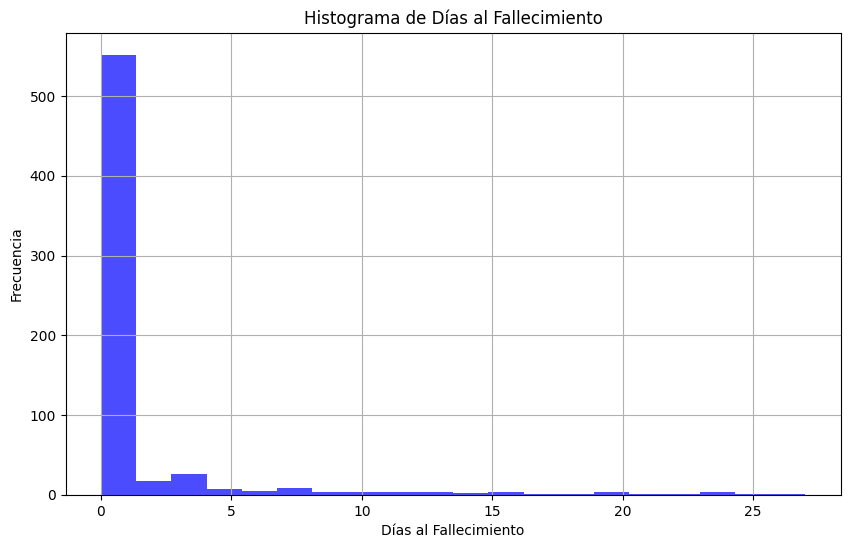

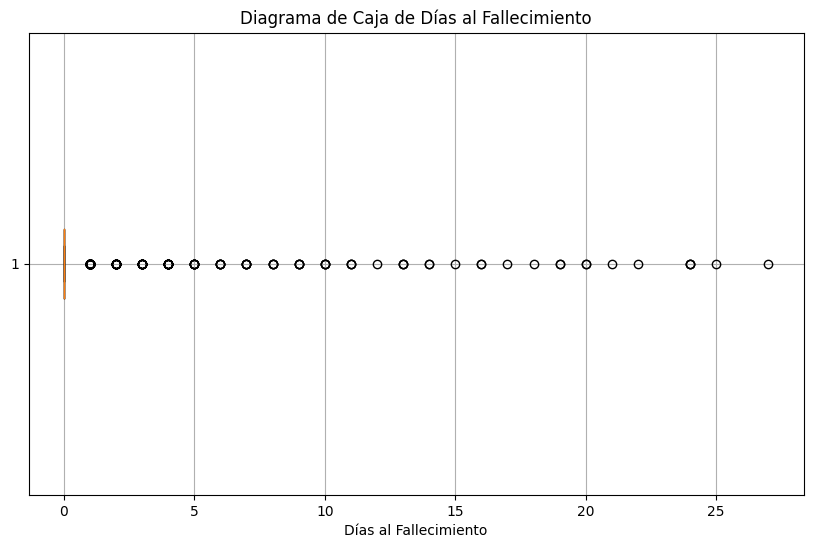

In [41]:
# Se filtran los valores "SD" (sin datos) antes de graficar
dfFechaFallecimiento = df2[df2["DIAS_AL_FALLECIMIENTO"] != "SD"]

# Se convierte la columna "DIAS_AL_FALLECIMIENTO" a tipo de dato numérico
dfFechaFallecimiento["DIAS_AL_FALLECIMIENTO"] = pd.to_numeric(dfFechaFallecimiento["DIAS_AL_FALLECIMIENTO"], errors="coerce")

# Se crea un histograma para visualizar la distribución de días al fallecimiento
plt.figure(figsize=(10, 6))
plt.hist(dfFechaFallecimiento["DIAS_AL_FALLECIMIENTO"], bins=20, color="blue", alpha=0.7)
plt.xlabel("Días al Fallecimiento")
plt.ylabel("Frecuencia")
plt.title("Histograma de Días al Fallecimiento")
plt.grid(True)
plt.show()

# Se crea un diagrama de caja para visualizar la distribución y los valores atípicos
plt.figure(figsize=(10, 6))
plt.boxplot(dfFechaFallecimiento['DIAS_AL_FALLECIMIENTO'], vert=False)
plt.xlabel('Días al Fallecimiento')
plt.title('Diagrama de Caja de Días al Fallecimiento')
plt.grid(True)
plt.show()

Se exporta a CSV

In [42]:
# Con los pasos anteriores completos se exporta a formato CSV y se termina el ETL.

df2.to_csv("VICTIMAS.csv", index=False)

In [43]:
df2 = pd.read_csv("VICTIMAS.csv")

In [44]:
df2

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIAS_AL_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,0
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00,0
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00,0
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00,11
...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00,0
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00,5
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00,0
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00,3
